# Crystal hit energy distribution

This is a jupyter notebook for investigating crystal hit energy distribution.

In [1]:
import ROOT

Welcome to JupyROOT 6.08/04


## 1. First read the data from a simulated root file and instantiate some TCanvases for plotting

In [2]:
f = ROOT.TFile('gm2ringsim_truth_32M.root')
if not ROOT.gROOT.FindObject('c'):
    c = ROOT.TCanvas('c', 'c', 1000, 600)
if not ROOT.gROOT.FindObject('c_calo'):
    c_calo = ROOT.TCanvas('c_calo', 'c_calo', 1200, 800)
    c_calo.Divide(9, 6)
if not ROOT.gROOT.FindObject('c_xtal'):
    c_xtal = ROOT.TCanvas('c_xtal', 'c_xtal', 1200, 800)
    c_xtal.Divide(6, 4)
if not ROOT.gROOT.FindObject('c_overlay'):
    c_overlay = ROOT.TCanvas('c_overlay', 'c_overlay', 1000, 600)
plotted_objects = None
ROOT.gStyle.SetOptStat(1110);
ROOT.gStyle.SetTitleH(0.1);

## 2. Define some functions here to make a single crystal plot or a whole calorimeter plot in grid

In [3]:
# multipurpose single plot
def plot_xtalhit(calo_num, xtal_num, canvas, grid_index=0, overlay=False):
    xtalhit = ROOT.TH1D()
    xtalhit = f.Get('truthAnalyzer/calo{0:02d}xtalHit{1:02d}'.format(calo_num, xtal_num))
    xtalhit.SetBinContent(1,0)
    xtalhit.ResetStats()
    xtalhit.GetXaxis().SetRangeUser(0,3000)
    xtalhit.GetYaxis().SetRangeUser(0.5,40000)
    xtalhit.GetXaxis().SetNdivisions(5)
    xtalhit.GetXaxis().SetLabelSize(0.06)
    xtalhit.GetYaxis().SetLabelSize(0.06)
    if not overlay:
        xtalhit.Draw()
        xtalhit.SetLineColor(1)
        xtalhit.SetFillColor(5)
        ROOT.gPad.Modified()
        ROOT.gPad.Update()
        st = canvas.cd(grid_index).GetPrimitive("stats")
        st.SetX1NDC(0.4)
        st.SetX2NDC(0.9)
        st.SetY1NDC(0.6)
        st.SetY2NDC(0.9)
    elif overlay and grid_index ==1:
        xtalhit.SetTitle('xtalHit{0:02d}'.format(xtal_num))
        xtalhit.Draw()
        xtalhit.SetFillColor(0)
        xtalhit.SetLineColor(grid_index%2+1)
    elif overlay and grid_index !=1:
        xtalhit.Draw('sames')
        xtalhit.SetFillColor(0)
        xtalhit.SetLineColor(grid_index)
        xtalhit.SetLineColor(grid_index%2+1)
    canvas.Draw()
    
# plot a single crystal hit
def plot_single(calo_num, xtal_num):
    ROOT.gStyle.SetOptStat(1110);
    c.cd()
    c.SetLogy()
    global plotted_objects
    plotted_objects = plot_xtalhit(calo_num, xtal_num, c)
    
# plot a calorimeter-worth of crystal hits
def plot_calo_grid(calo_num):
    ROOT.gStyle.SetOptStat(1110);
    # have to make sure objects are not garbage collected
    objects = []
    for xtal_num in xrange(54):
        c_calo.cd(54 - xtal_num)
        c_calo.cd(54 - xtal_num).SetLogy()
        objects.append(plot_xtalhit(calo_num, xtal_num, c_calo, 54 - xtal_num))
    global plotted_objects
    plotted_objects = objects

# plot crystal hits of the same location from all calorimeters
def plot_crystal_grid(xtal_num):
    ROOT.gStyle.SetOptStat(1110);
    # have to make sure objects are not garbage collected
    objects = []
    for calo_num in xrange(24):
        c_xtal.cd(calo_num + 1)
        c_xtal.cd(calo_num + 1).SetLogy()
        objects.append(plot_xtalhit(calo_num, xtal_num, c_xtal, calo_num + 1))
    global plotted_objects
    plotted_objects = objects
    
def plot_crystal_overlay(xtal_num):
    ROOT.gStyle.SetOptStat(0);
    # have to make sure objects are not garbage collected
    c_overlay.cd()
    c_overlay.SetLogy()
    global plotted_objects
    for calo_num in xrange(24):
        plotted_objects = plot_xtalhit(calo_num, xtal_num, c_overlay, calo_num + 1, True)

## 3. Example plots

### 3.1 An example single plot here

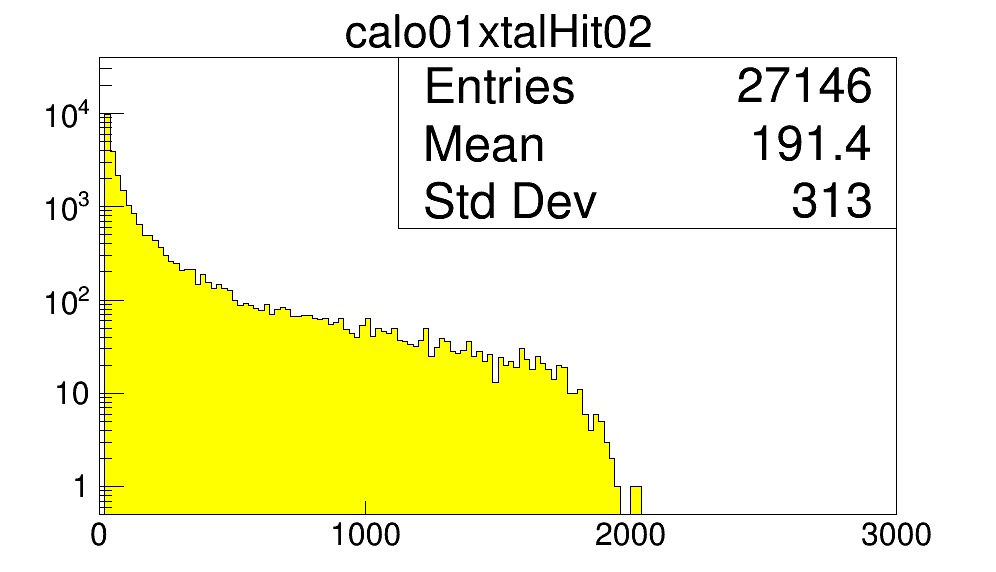

In [4]:
plot_single(1,2) # calo_num = 1, xtal_num = 2

### 3.2 An example calorimeter plot here

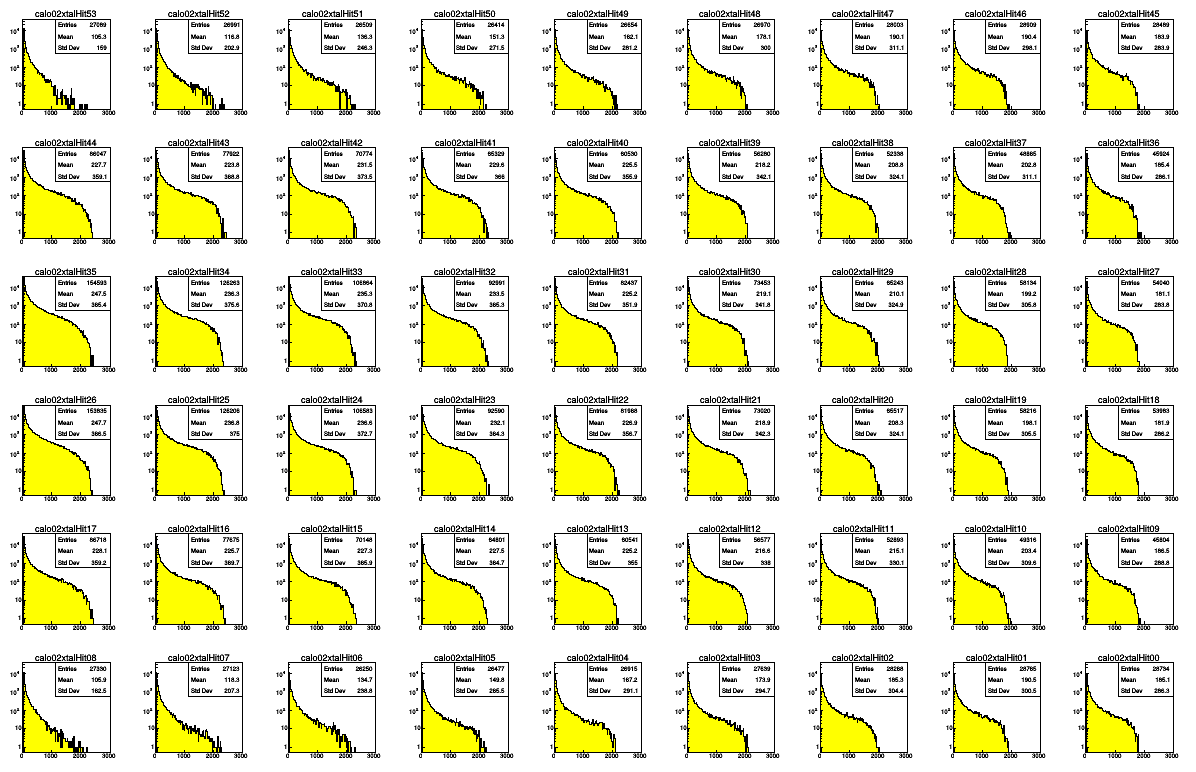

In [5]:
plot_calo_grid(2) # calo_num = 2

### 3.3 An example crystal plot here

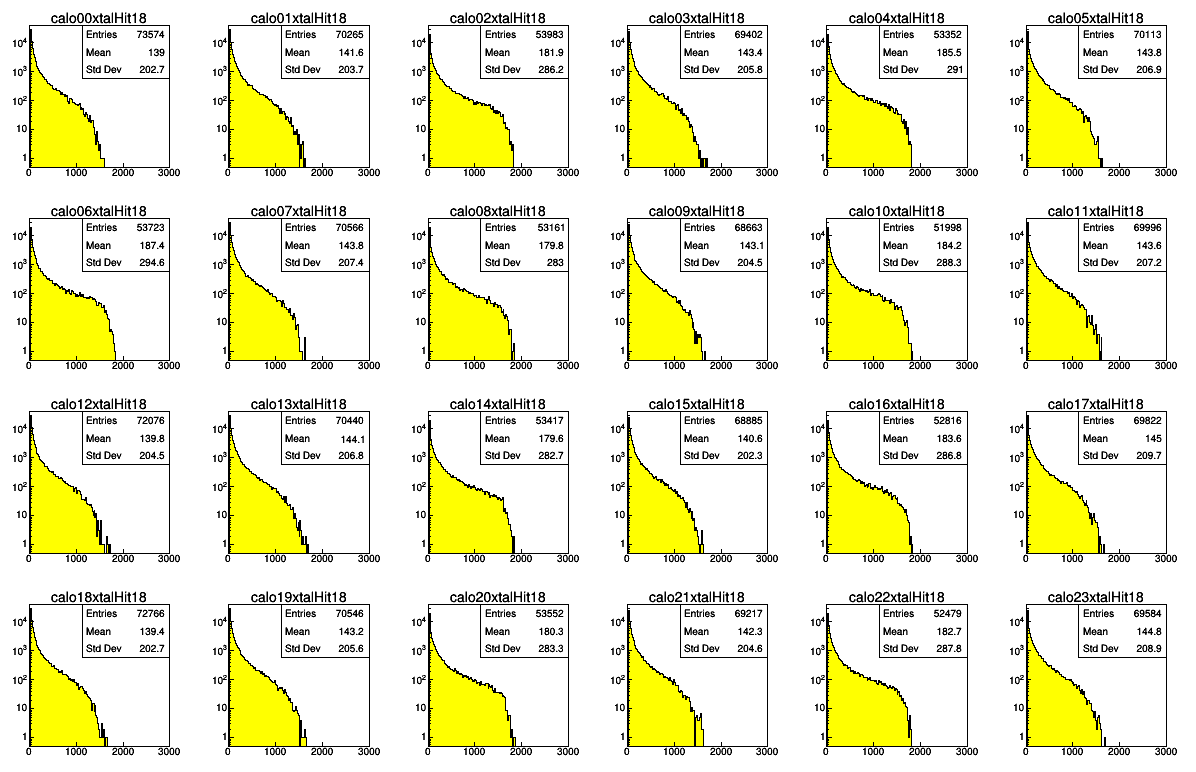

In [6]:
plot_crystal_grid(18) # xtal_num = 18

### 3.4 An example crystal overlay plot here

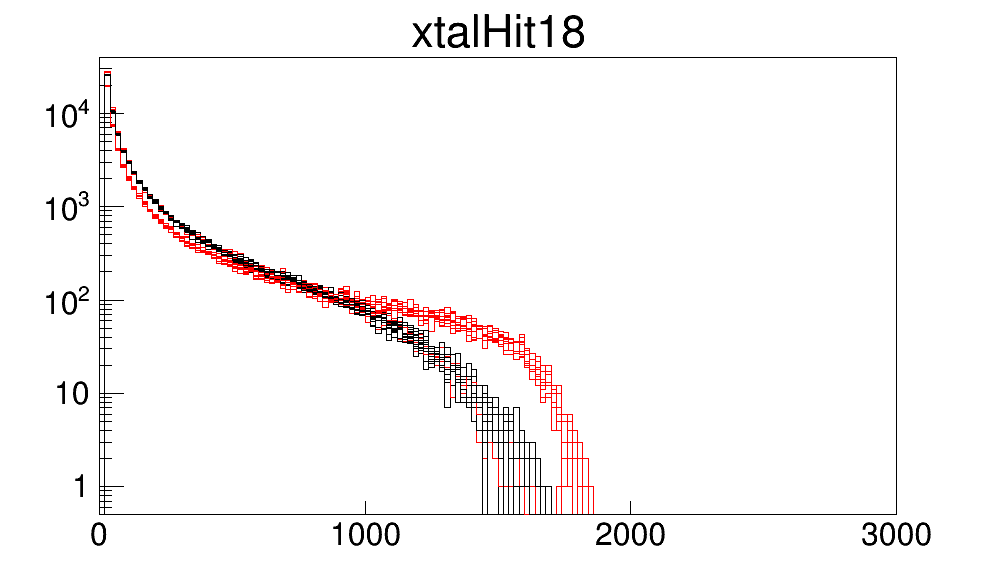

In [7]:
plot_crystal_overlay(18) # xtal_num = 18